In [1]:
import numpy as np
import pandas as pd
import keras 
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras import initializers
import keras.utils
from keras.optimizers import RMSprop, Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.image as mpimg
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
import itertools
np.random.seed(2)

In [2]:
test_data = pd.read_excel('test_digit.xlsx')
train_data = pd.read_excel('train_digit.xlsx')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [5]:
train_data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [323]:
test_data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,28000.0,...,28000.000000,28000.000000,28000.000000,28000.000000,28000.000000,28000.0,28000.0,28000.0,28000.0,28000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164607,0.073214,0.028036,0.011250,0.006536,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.473293,3.616811,1.813602,1.205211,0.807475,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,254.000000,193.000000,187.000000,119.000000,0.0,0.0,0.0,0.0,0.0


In [324]:
test_data.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
train_data.tail(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [326]:
train_data.shape, test_data.shape

((42000, 785), (28000, 784))

In [327]:
train_data.isna().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [328]:
test_data.isna().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

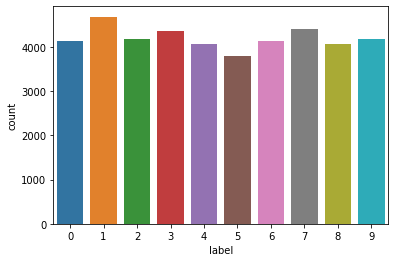

In [330]:
sns.countplot(x=train_data['label'])

In [331]:
#Normalizing data
y_train = train_data['label']
X_train = train_data.drop('label', axis=1)

In [332]:
X_train = X_train/255.0
test_data = test_data/255.0

In [333]:
 #Reshaping the data
X_train = X_train.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28, 1)

In [334]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [335]:
# One got encoding the data for easy modelling
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [336]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=2)

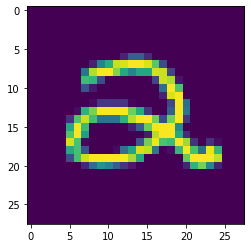

In [337]:
g = plt.imshow(X_train[12][:,:,0])

In [338]:
model = Sequential()
#Layer 1
model.add(Conv2D(filters = 32, kernel_initializer= tf.keras.initializers.glorot_uniform(seed=0), kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32,kernel_initializer= tf.keras.initializers.glorot_uniform(seed=0), kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.50))

#Layer2
model.add(Conv2D(filters = 64,kernel_initializer= tf.keras.initializers.glorot_uniform(seed=0), kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64,kernel_initializer= tf.keras.initializers.glorot_uniform(seed=0), kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.50))

# Output layer
model.add(Flatten())
model.add(Dense(64, kernel_initializer= tf.keras.initializers.glorot_uniform(seed=0), activation = "relu"))
model.add(Dropout(0.50))
model.add(Dense(1, kernel_initializer= tf.keras.initializers.glorot_uniform(seed=0), activation = "softmax"))

In [339]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 64)         

In [340]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, epsilon=1e-08, decay=0.0)
optimizer

In [341]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [342]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', verbose=1, patience=3, factor=0.5, min_lr=0.0001)
learning_rate_reduction

In [343]:
epochs = 1
batch_size = 100
history = model.fit(X_train, y_train, batch_size=batch_size, verbose=2, epochs=epochs, validation_data=(X_valid, y_valid))

378/378 - 222s - loss: 0.2725 - accuracy: 0.9140 - val_loss: 0.0761 - val_accuracy: 0.9750


In [344]:
datagenerator = ImageDataGenerator(featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=20,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False,  
        vertical_flip=False)

In [345]:
datagenerator.fit(X_train)

In [346]:
history = model.fit(datagenerator.flow(X_train, y_train, batch_size=batch_size),
                epochs=1, validation_data=(X_valid, y_valid), verbose=-1, 
                steps_per_epoch=X_train.shape[0]//batch_size,
                callbacks=[learning_rate_reduction])

<Figure size 576x432 with 0 Axes>

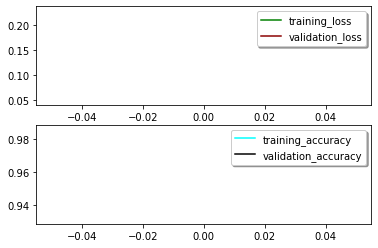

<Figure size 576x432 with 0 Axes>

In [347]:
plt.figure(figsize=(8,6))
fig, [ax1, ax2] = plt.subplots(2,1)
ax1.plot(history.history['loss'], color='green', label='training_loss')
ax1.plot(history.history['val_loss'], color='darkred', label='validation_loss')
ax1.legend(loc='best', shadow=True)

plt.figure(figsize=(8,6))
ax2.plot(history.history['accuracy'], color='cyan', label='training_accuracy')
ax2.plot(history.history['val_accuracy'], color='black', label='validation_accuracy')
ax2.legend(loc='best', shadow=True)

In [348]:
#Predict the values from the validation dataset
y_pred = model.predict(X_valid)
#Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_valid,axis = 1) 

In [349]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_true,y_pred_classes))
print(confusion_matrix(y_true,y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       411
           1       0.99      0.99      0.99       485
           2       0.99      0.99      0.99       403
           3       0.99      0.98      0.99       418
           4       0.99      0.98      0.98       461
           5       0.99      0.98      0.99       372
           6       0.99      0.98      0.99       413
           7       0.99      1.00      0.99       446
           8       0.96      0.98      0.97       382
           9       0.96      0.98      0.97       409

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200

[[410   0   0   0   0   0   1   0   0   0]
 [  0 480   2   1   0   0   0   0   1   1]
 [  0   0 398   0   0   0   0   1   3   1]
 [  0   0   1 411   0   2   0   0   3   1]
 [  0   1   1   0 450   0   1   0   0   8]
 [  0   0   0   2   0 366 

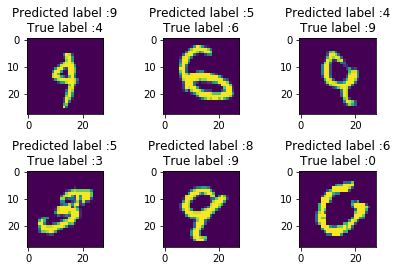

In [363]:
#Display some error results 
#Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_valid_errors = X_valid[errors]

def show_errors(errors_index,img_errors,pred_errors, obs_errors):
    
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=False,sharey=False)
    plt.tight_layout(pad=2.3)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

sorted_errors = np.argsort(delta_pred_true_errors)

#top 6 errors 
frequent_errors = sorted_errors[:6]

show_errors(frequent_errors, X_valid_errors, y_pred_classes_errors, y_true_errors)

In [360]:
# predict results
results = model.predict(test_data)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1) 
results = pd.Series(results,name="Label")
results

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64